<a href="https://colab.research.google.com/github/nitin-barthwal/Machine-Learning-Projects/blob/master/booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question: Bank Marketing Analysis
Attached is a txt file containing some real data that relates to a marketing campaign run by a bank. 

The aim of the marketing campaign was to get customers to subscribe to a bank
term deposit product. Whether they did this or not is variable ‘y’ in the data set.
The bank in question is considering how to optimise this campaign in future.


**What would your recommendations to the marketing manager be?**


**Variable description**

**Input variables**: 

1 - age (numeric) 

2 - job : type of job (categorical:'admin.','unknown','unemployed','management','housemaid','entrepreneur','student','blue-collar','self-employed','retired','technician','services') 

3 - marital : marital status (categorical: 'married','divorced','single'; note: 'divorced' means divorced or widowed) 

4 - education (categorical: 'unknown','secondary','primary','tertiary') 

5 - default: has credit in default? (binary: 'yes','no')

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: 'yes','no') 

8 - loan: has personal loan? (binary: 'yes','no') ### related with the last contact of the current campaign: 

9 - contact: contact communication type (categorical: 'unknown','telephone','cellular') 

10 - day: last contact day of the month (numeric) 

11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 

12 - duration: last contact duration, in seconds (numeric) #### other
attributes: 

13 - campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact) 

14 - pdays: number of days that passed by after the
client was last contacted from a previous campaign (numeric, -1 means client was not
previously contacted) 

15 - previous: number of contacts performed before this campaign
and for this client (numeric) 

16 - poutcome: outcome of the previous marketing campaign
(categorical: 'unknown','other','failure','success')

**Output variable (desired target): **

17 - y - has the client subscribed a term deposit? (binary:
'yes','no')

Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings            
warnings.filterwarnings("ignore") 

%matplotlib inline

## Viewing Dataset

In [0]:
data = pd.read_csv('Business_Case_SP_Analytics_data.txt',sep='\t')

print(data.head(10))

   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may     

In [0]:
data1 = pd.read_csv('Business_Case2_new.csv',sep='\t')

print(data1.head())

FileNotFoundError: ignored

## Checking the columns and their corresponding data types,along with finding whether they contain null values or not.

In [0]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


1. Data has 7 integer values  and 10 Categorical Values.

2. No variable column has null/missing values.

# Data Insights

In [0]:
data.shape

(45211, 17)

3. Dataset comprises of 45211 observations and 17 features.

Out of which one is dependent variable and rest 16 are independent variables.

We now will check the distribution of the data.

Number of Non Subscribers  (39922, 17)
Number of clients who subscribed for term deposit  (5289, 17)


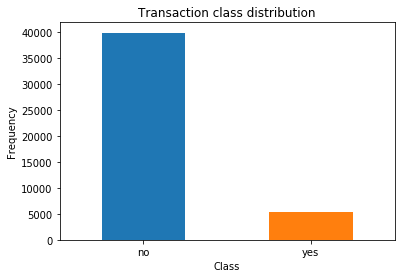

In [0]:
LABELS = ['no' , 'yes']

count_classes = pd.value_counts(data['y'], sort = True)
count_classes.plot(kind = 'bar',rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

print('Number of Non Subscribers ' , data.loc[(data.y == 'no')].shape) 
print('Number of clients who subscribed for term deposit ' , data.loc[(data.y == 'yes')].shape) 


Clearly the data is unbalanced as the number of non subscribers are very high as compared to subscribers.

Hence we will apply data balancing method SMOTe to balance the dataset.




## Converting Categorical values to numerial
As the dataset contains many categorical values, we need to convert it into numeric values to apply statistial methods.
we will apply label encoder to converting it into numeric value.

In [0]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

data['job'] = lb_make.fit_transform(data['job'])
data['marital'] = lb_make.fit_transform(data['marital'])
data['marital'] = lb_make.fit_transform(data['marital'])
data['education'] = lb_make.fit_transform(data['education'])
data['default'] = lb_make.fit_transform(data['default'])
data['housing'] = lb_make.fit_transform(data['housing'])
data['month'] = lb_make.fit_transform(data['month'])
data['loan'] = lb_make.fit_transform(data['loan'])
data['contact'] = lb_make.fit_transform(data['contact'])
data['poutcome'] = lb_make.fit_transform(data['poutcome'])
data['y'] = lb_make.fit_transform(data['y'])


In [0]:
data.describe(include = 'all')


age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      4.339762      1.167725      1.224813      0.018027   
std       10.618762      3.272657      0.608230      0.747997      0.133049   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     1362.272058      0.555838      0.160226      0.640242     15.806419   
std      3044.765829      0.496878      0.366820      0.897951      8.322476   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%        72.000000      0.000000      0.000000      0.000000      8.000000   
50%       448.000000      1.000000      0.000000      0.000000     16.000000   
75%      1428.000000      1.000000      0.000000      2.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       5.523014    258.163080      2.763841     40.197828      0.580323   
std        3.006911    257.527812      3.098021    100.128746      2.303441   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    103.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    319.000000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome             y  
count  45211.000000  45211.000000  
mean       2.559974      0.116985  
std        0.989059      0.321406  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

## Applying SMOTe

In [0]:
from imblearn.over_sampling import SMOTENC

# Resample the minority class. 

smote = SMOTENC(categorical_features = [1,2,3,4,6,7,8,10,15], random_state=7)

X_sm, y_sm = smote.fit_resample(data.iloc[:,0:-1], data['y'])


In [0]:
# convertng numpy array to pandas dataframe
df=pd.DataFrame({'age':X_sm[:,0],'job':X_sm[:,1],'marital':X_sm[:,2],'education':X_sm[:,3],'default':X_sm[:,4],'balance':X_sm[:,5],'hosuing':X_sm[:,6],'loan':X_sm[:,7],'contact':X_sm[:,8],'day':X_sm[:,9],'month':X_sm[:,10],'duration':X_sm[:,11],'campaign':X_sm[:,12],'pdays':X_sm[:,13],'previous':X_sm[:,14],'poutcome':X_sm[:,15]})

df['y']=pd.DataFrame(data=y_sm)


In [0]:
from pandas import DataFrame
df1 = DataFrame(df, columns= ['age','job','marital',' education','default','balance','housing' ,'loan' ,'contact' ,'day','month' ,'duration','campaign' ,'pdays' ,'previous'  ,'poutcome', 'default'  ,'balance' ,'housing' , 'loan', 'contact','	day','month'	,'duration' ,	'campaign' ,'pdays' ,'previous' ,'poutcome'	,'y'])

export_excel = df1.to_csv (r'C:\Users\Nitin\Desktop\Sem2\export_dataframe.csv', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path


In [0]:
print('unbalance dataframe no values ',data[data['y']==0].shape)
print('unbalanced dataframe yes values ',data[data['y']==1].shape)

print('\nBalanced Dataframe no values', df[df.y==0].shape)
print('Balanced Dataframe yes values ', df[df.y==1].shape)


print('\n Now the data is balanced ')

unbalance dataframe no values  (39922, 17)
unbalanced dataframe yes values  (5289, 17)

Balanced Dataframe no values (39922, 17)
Balanced Dataframe yes values  (39922, 17)

 Now the data is balanced 


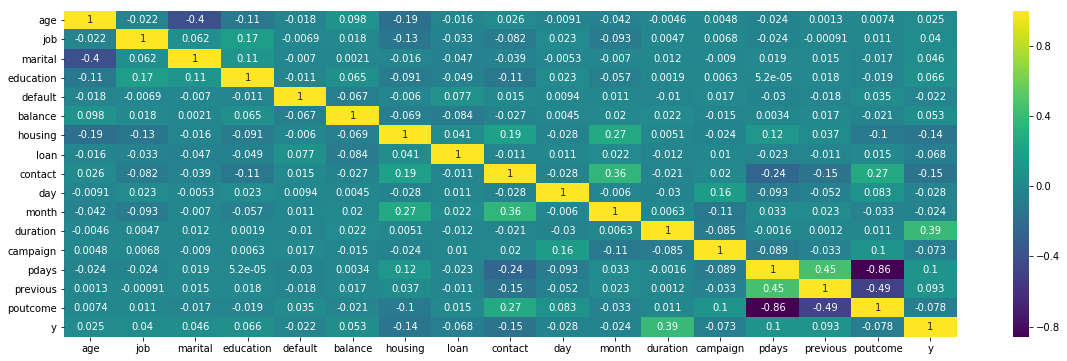

In [0]:

plt.figure(figsize=(20,6))
sns.heatmap(data.corr(), annot=True, cmap = 'viridis')

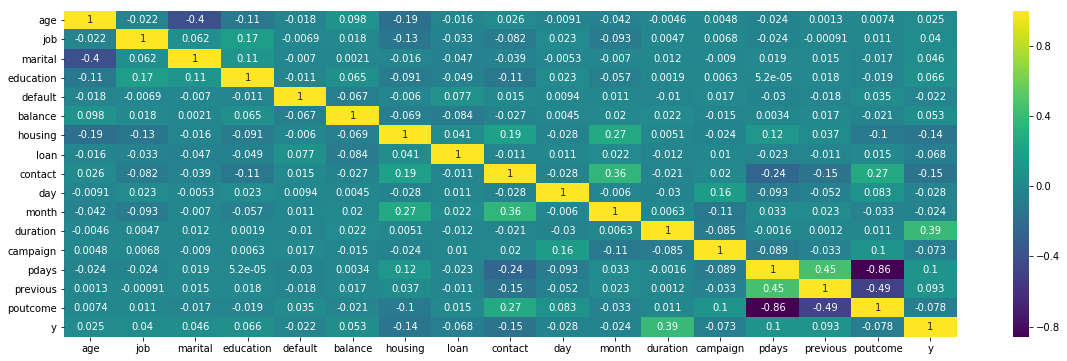

In [0]:

plt.figure(figsize=(20,6))
sns.heatmap(data.corr(), annot=True, cmap = 'viridis')

# Summary Statistics

In [0]:
df.describe(include = 'all')


age           job       marital     education       default  \
count  79844.000000  79844.000000  79844.000000  79844.000000  79844.000000   
mean      41.130854      4.845987      1.248334      1.311958      0.011259   
std       10.918733      3.300169      0.583626      0.689260      0.105512   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.114358      9.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       hosuing          loan       contact           day  \
count   79844.000000  79844.000000  79844.000000  79844.000000  79844.000000   
mean     1543.689787      0.443740      0.097515      0.407119     15.516464   
std      3133.461426      0.496828      0.296660      0.779403      7.802006   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%       123.000000      0.000000      0.000000      0.000000      9.000000   
50%       557.000000      0.000000      0.000000      0.000000     15.109080   
75%      1749.218303      1.000000      0.000000      0.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  79844.000000  79844.000000  79844.000000  79844.000000  79844.000000   
mean       5.768135    378.462303      2.499548     51.085301      0.818939   
std        3.252983    347.473214      2.575431    106.804649      2.268162   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    144.812228      1.000000     -1.000000      0.000000   
50%        6.000000    259.242854      2.000000     -1.000000      0.000000   
75%        8.000000    506.000000      3.000000     42.368763      1.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome             y  
count  79844.000000  79844.000000  
mean       2.543172      0.500000  
std        0.936656      0.500003  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.500000  
75%        3.000000      1.000000  
max        3.000000      1.000000

# Key Observations -

1.   After seeing the 75% tile and max balance it seems balance has extreme values-Outliers.

2. Specially we need to check the impact of Negative Balance (-8019.00) .


3.  Notably large difference in 75th %tile and max campaign. Usually on an average a person is contacted  3 times during the current campaign but in our dataset max contacts  were mentioned as 63 ,which could be a typo error and need to be cheked. 

4. The number of previous contacts performed before this campaign for a client is quite high (275) as compared to the average number of contacts performed. This seems to be a typo error aswell and an outlier that needs to be removed.

Thus observations 1,3 & 4 suggests that there are extreme values-Outliers in our dataset.

Detecting outliers using Zscore and removing the values which has crossed the  threshold of 8

In [0]:
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)
threshold = 10
#print(np.where(z > threshold))

[[1.54498257 0.25634826 0.42550535 ... 0.36106069 0.48772577 1.        ]
 [0.26277448 1.25873535 1.28793267 ... 0.36106069 0.48772577 1.        ]
 [0.74467473 0.8623817  0.42550535 ... 0.36106069 0.48772577 1.        ]
 ...
 [0.47476532 1.56175207 0.42550535 ... 0.36106069 0.48772577 1.        ]
 [0.67639859 1.46841515 1.28793267 ... 0.08450994 0.48772577 1.        ]
 [0.03917369 1.46841515 0.42550535 ... 0.36106069 0.48772577 1.        ]]


In [0]:
new_df = df[(z < threshold).all(axis=1)]
print(df.shape)
print(new_df.shape)

(79844, 17)
(79621, 17)


In [0]:
new_df.describe(include = 'all')


age           job       marital     education       default  \
count  79621.000000  79621.000000  79621.000000  79621.000000  79621.000000   
mean      41.125132      4.845656      1.248125      1.311375      0.011266   
std       10.914324      3.300770      0.583647      0.688992      0.105542   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.085237      9.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

            balance       hosuing          loan       contact           day  \
count  79621.000000  79621.000000  79621.000000  79621.000000  79621.000000   
mean    1493.866799      0.443589      0.097374      0.406978     15.510257   
std     2695.626051      0.496811      0.296468      0.779384      7.797204   
min    -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%      123.000000      0.000000      0.000000      0.000000      9.000000   
50%      556.000000      0.000000      0.000000      0.000000     15.103147   
75%     1741.811770      1.000000      0.000000      0.000000     21.000000   
max    32685.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  79621.000000  79621.000000  79621.000000  79621.000000  79621.000000   
mean       5.769282    378.562715      2.464906     50.999934      0.796840   
std        3.254077    346.746902      2.344279    106.611405      1.872082   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    145.000000      1.000000     -1.000000      0.000000   
50%        6.000000    259.512643      2.000000     -1.000000      0.000000   
75%        8.000000    506.000000      3.000000     41.721634      1.000000   
max       11.000000   3804.133137     28.000000    871.000000     23.445886   

          poutcome             y  
count  79621.00000  79621.000000  
mean       2.54345      0.500509  
std        0.93635      0.500003  
min        0.00000      0.000000  
25%        3.00000      0.000000  
50%        3.00000      1.000000  
75%        3.00000      1.000000  
max        3.00000      1.000000

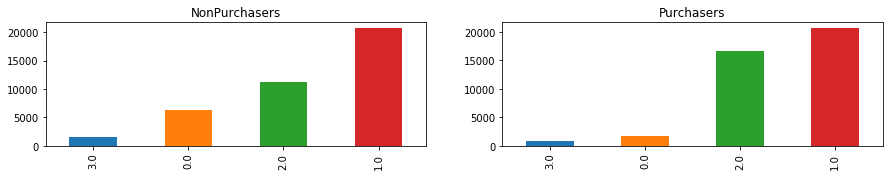

In [0]:
NonPurchasers_new = new_df[new_df.y == 0]
Purchasers_new = new_df[new_df.y == 1 ]

fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers_new['education' ].value_counts().sort_values().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers_new['education' ].value_counts().sort_values().plot(kind='bar', ax=ax2, figsize=(15,5))

In [0]:
#data['new_campaign'] = np.log(data['campaign'].astype(float))
#sns.boxplot(data['new_campaign'])

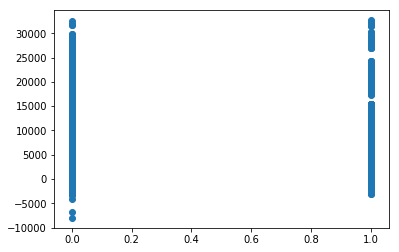

In [0]:
plt.scatter(new_df.y,new_df.balance)

In [0]:
#new_df_o['new_balance2'] = np.log(new_df_o['balance'].astype(float))
#sns.boxplot(new_df_o['new_balance2'])


Removing unknown


(18790, 17)
        age  job  marital  education  default  balance  hosuing  loan  \
24060  33.0  0.0      1.0        2.0      0.0    882.0      0.0   0.0   
24062  42.0  0.0      2.0        1.0      0.0   -247.0      1.0   1.0   
24064  33.0  7.0      1.0        1.0      0.0   3444.0      1.0   0.0   
24072  36.0  4.0      1.0        2.0      0.0   2415.0      1.0   0.0   
24077  36.0  4.0      1.0        2.0      0.0      0.0      1.0   0.0   

       contact   day  month  duration  campaign  pdays  previous  poutcome  y  
24060      1.0  21.0   10.0      39.0       1.0  151.0       3.0       0.0  0  
24062      1.0  21.0   10.0     519.0       1.0  166.0       1.0       1.0  1  
24064      1.0  21.0   10.0     144.0       1.0   91.0       4.0       0.0  1  
24072      1.0  22.0   10.0      73.0       1.0   86.0       4.0       1.0  0  
24077      1.0  23.0   10.0     140.0       1.0  143.0       3.0       0.0  1  


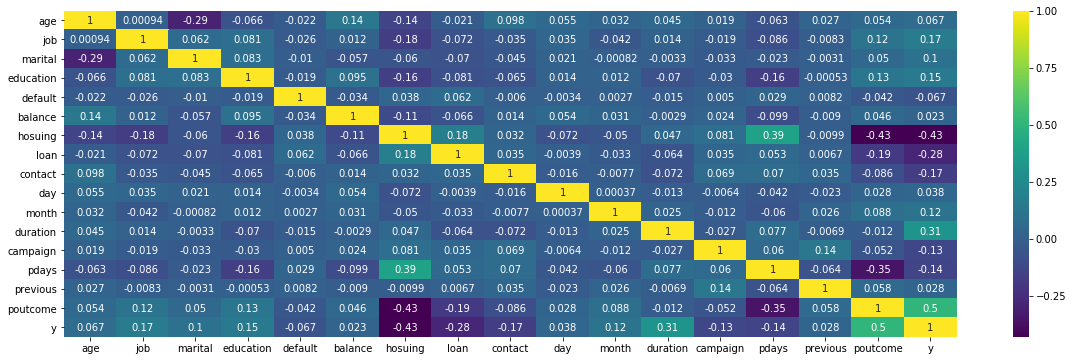

In [0]:
without_unknown = new_df[new_df['poutcome']!=3]  # 3= unknown
print(without_unknown.shape)
print(without_unknown.head())

plt.figure(figsize=(20,6))
sns.heatmap(without_unknown.corr(), annot=True, cmap = 'viridis')

In [0]:
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(),cmap='Blues',annot=False) 

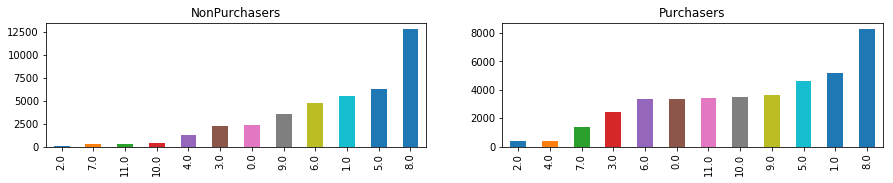

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers_new['month' ].value_counts().sort_values().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers_new['month' ].value_counts().sort_values().plot(kind='bar', ax=ax2, figsize=(15,5))

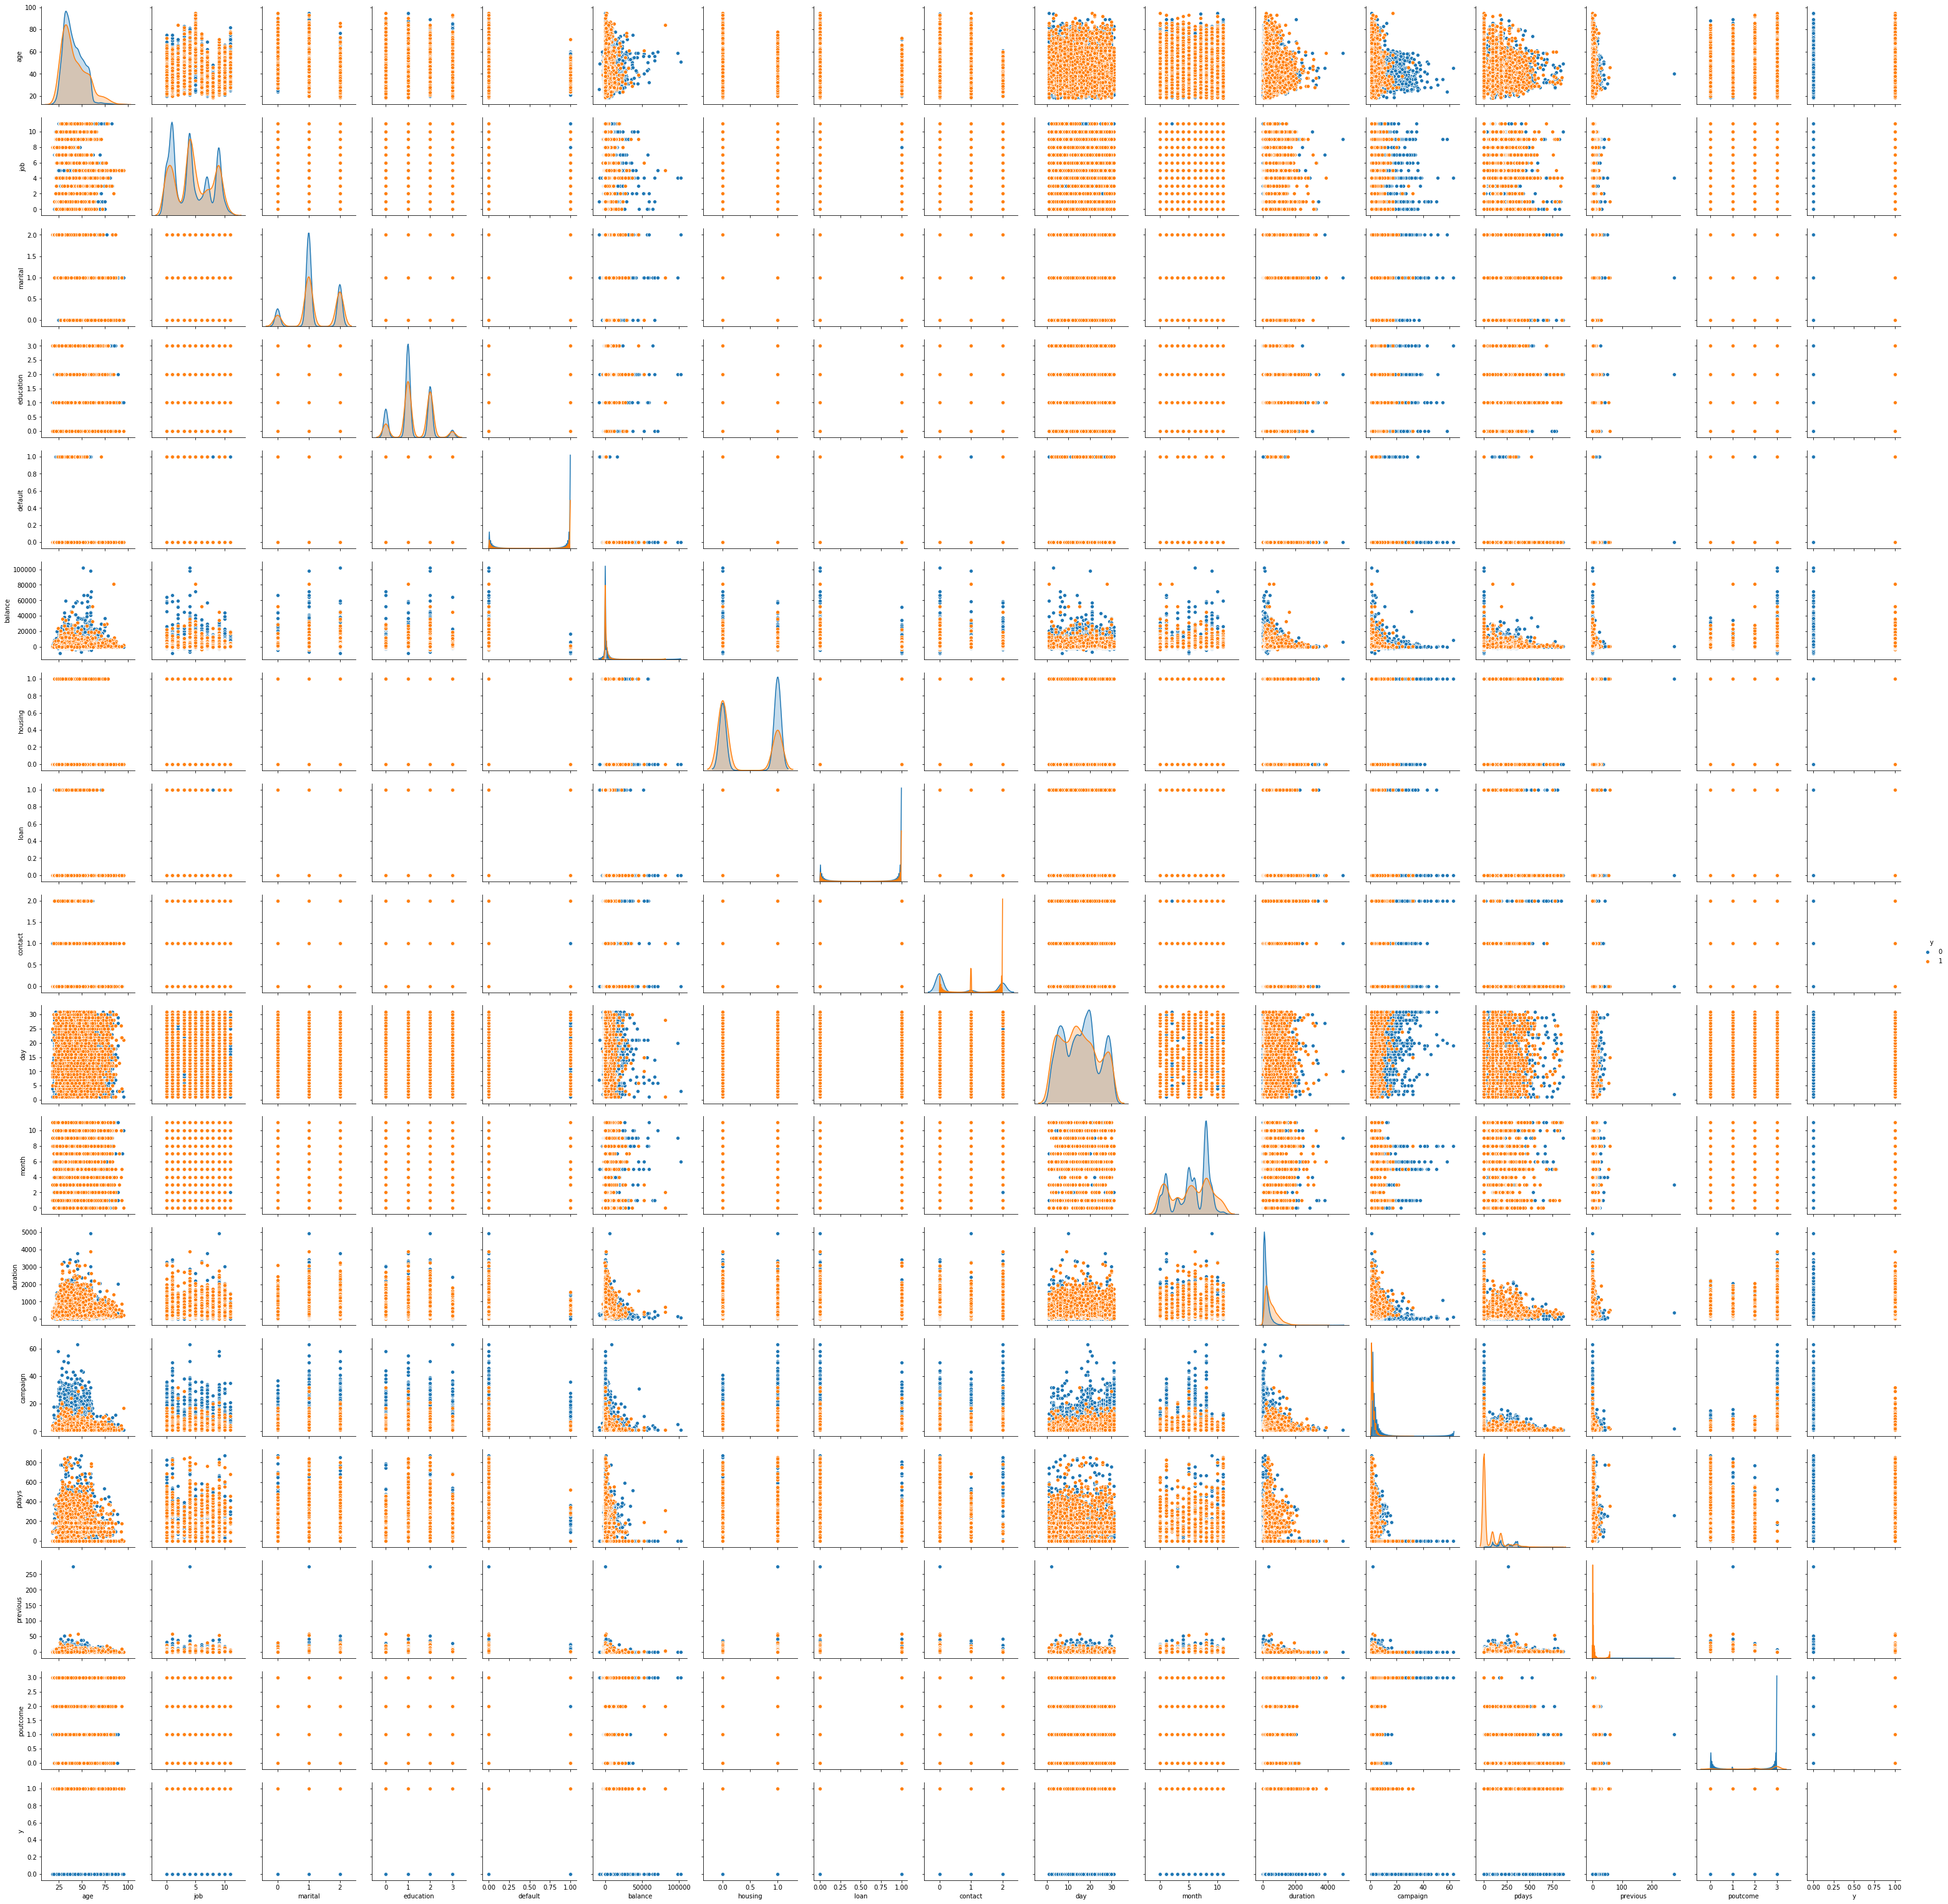

In [0]:
sns.pairplot(data, hue = 'y')

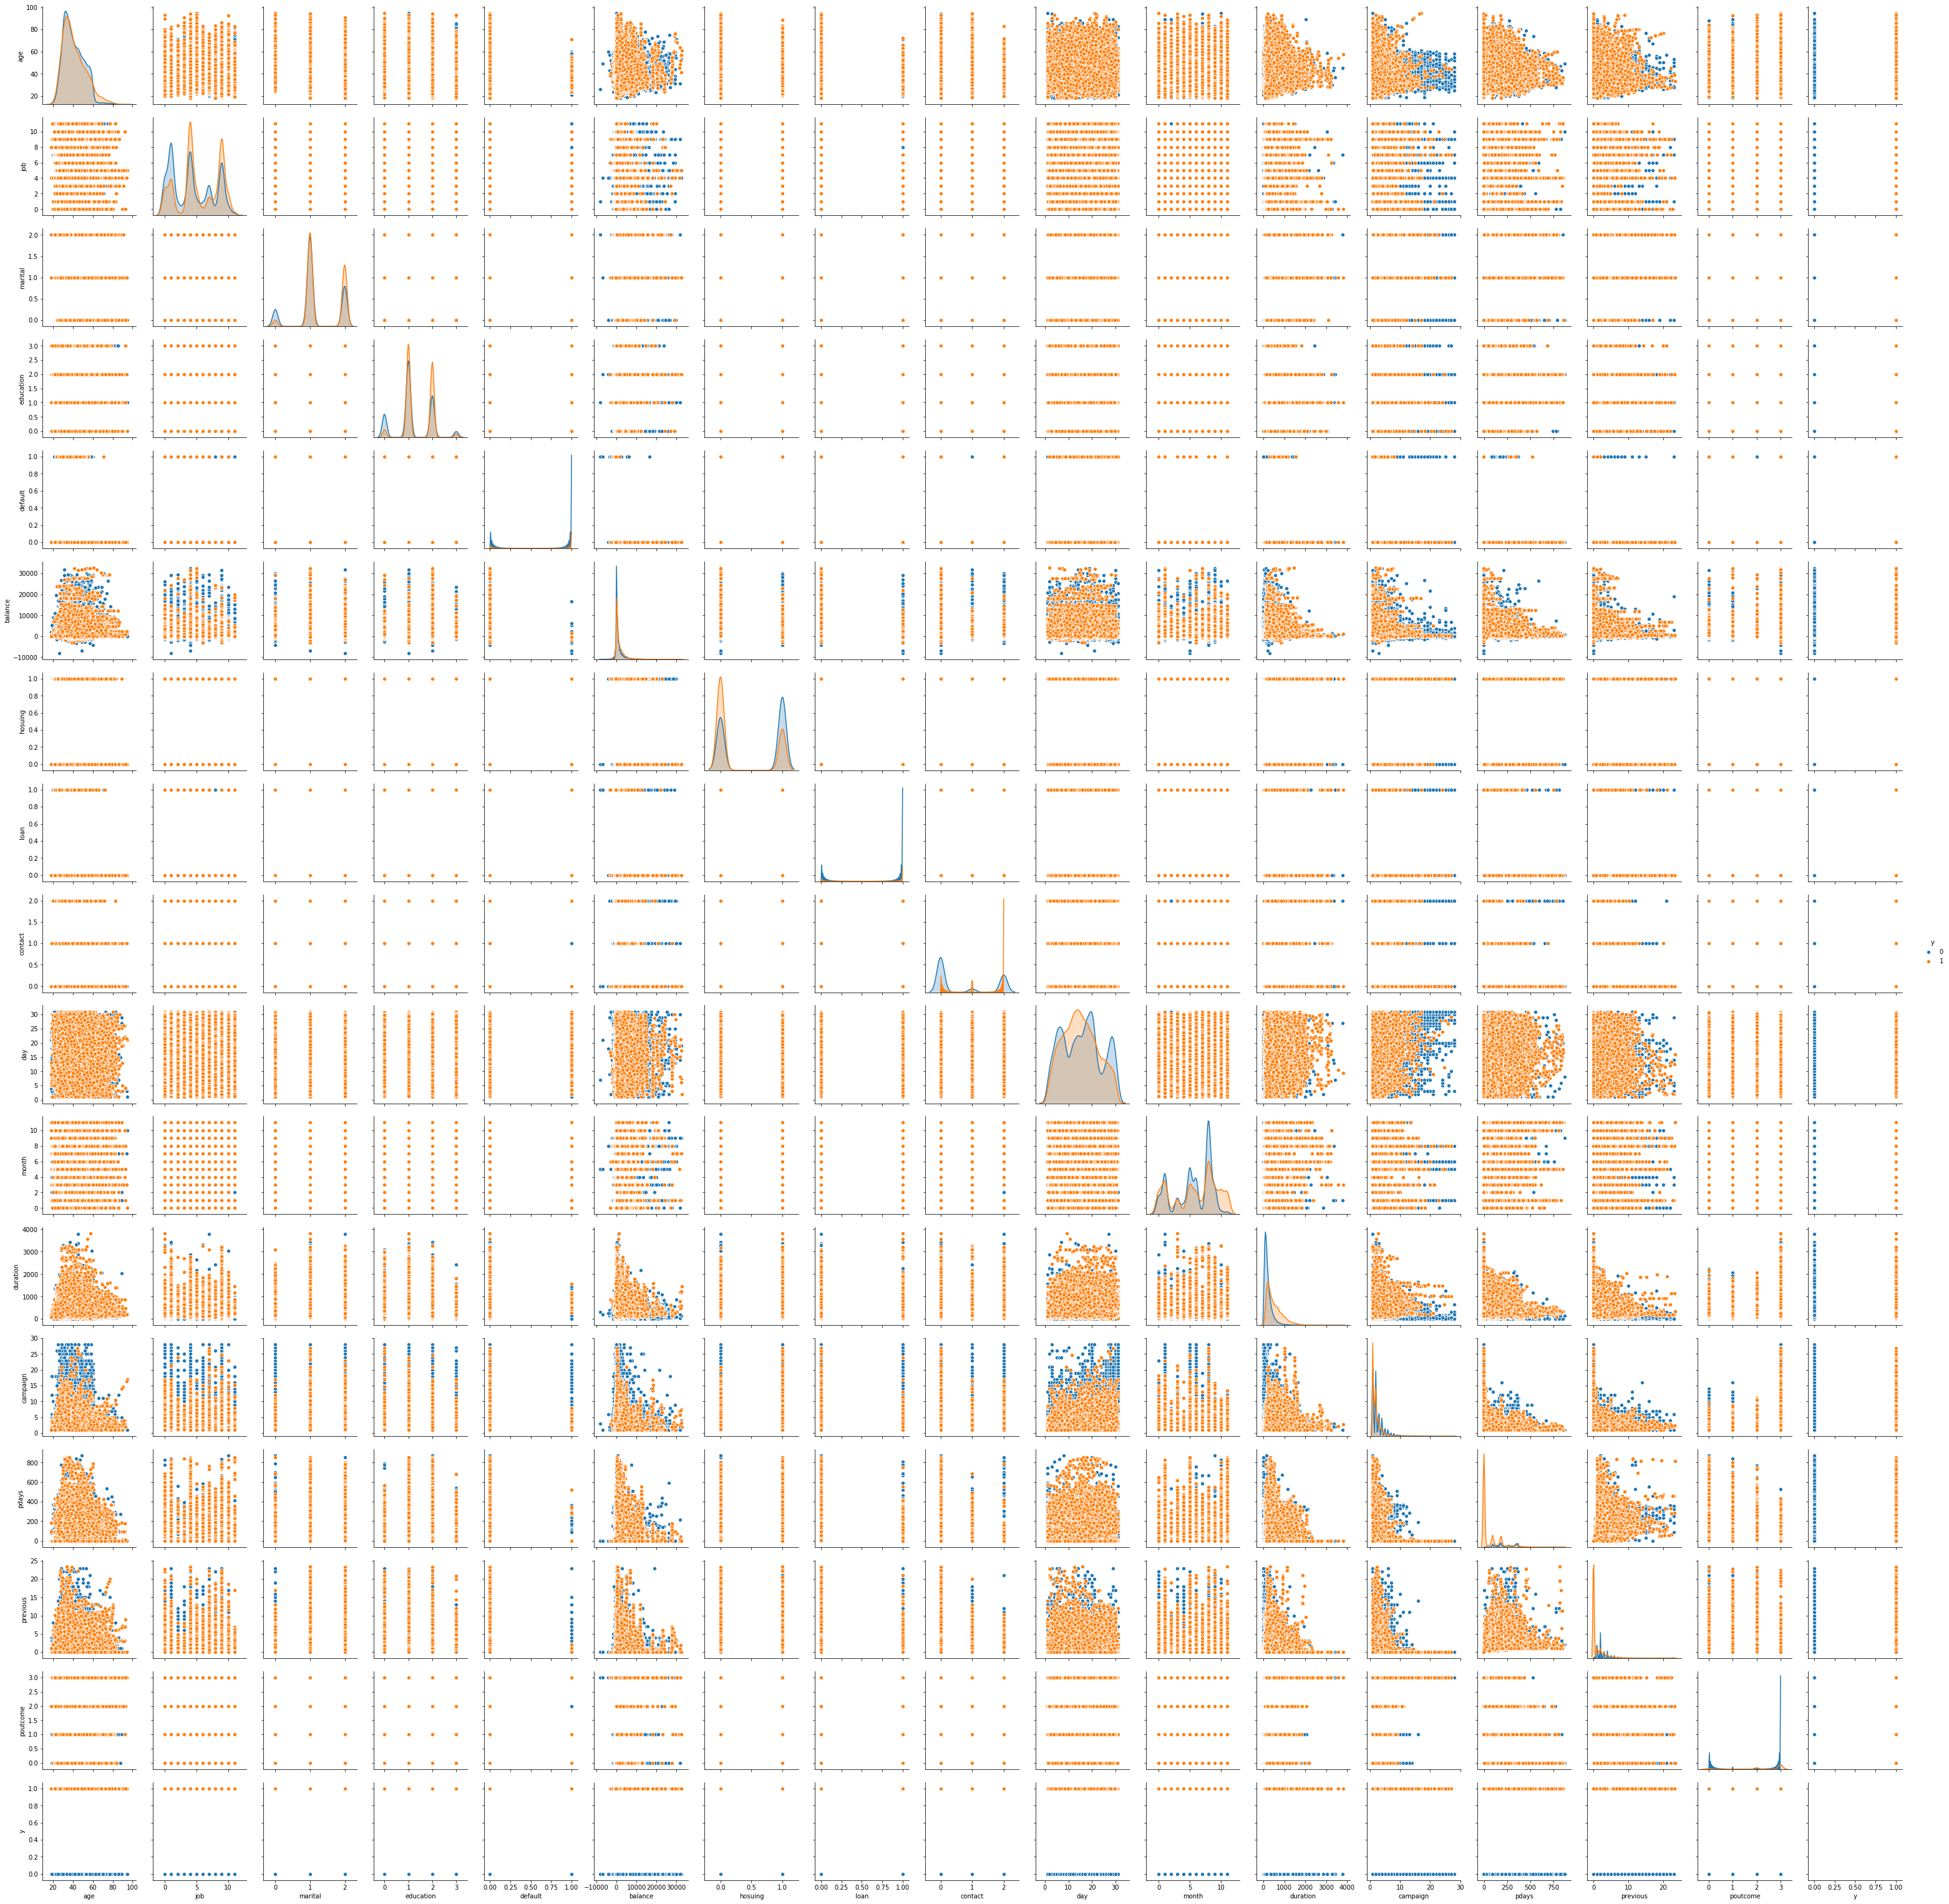

In [0]:
sns.pairplot(new_df, hue = 'y')

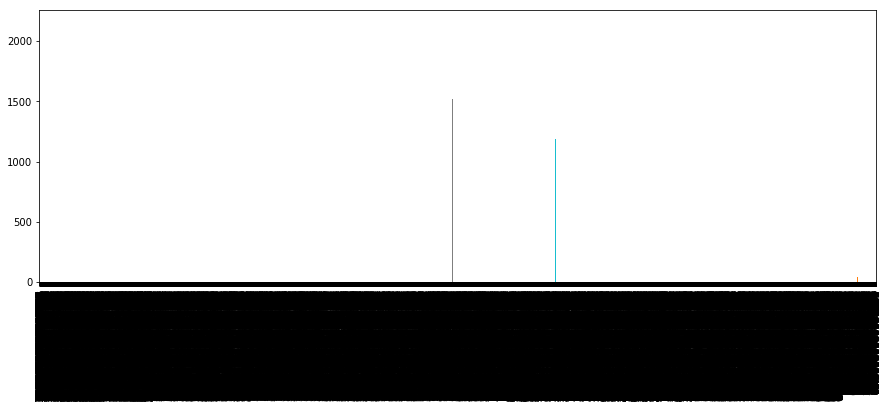

In [0]:

new_df['age' ].value_counts().sort_index().plot(kind='bar', figsize=(15,5))


NameError: ignored

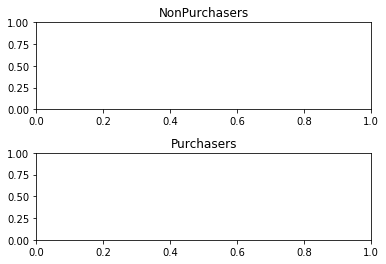

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
fig.subplots_adjust(hspace=0.5)

NonPurchasers['age' ].value_counts().sort_index().plot(kind='bar' , ax=ax1, figsize=(15,5))
Purchasers['age' ].value_counts().sort_index().plot(kind='bar' , ax=ax2, figsize=(15,5))

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers['job' ].value_counts().sort_index().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers['job' ].value_counts().sort_index().plot(kind='bar', ax=ax2, figsize=(15,5))


In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers['housing' ].value_counts().sort_index().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers['housing' ].value_counts().sort_index().plot(kind='bar', ax=ax2, figsize=(15,5))


In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers['month' ].value_counts().sort_values().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers['month' ].value_counts().sort_values().plot(kind='bar', ax=ax2, figsize=(15,5))

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers['campaign' ].value_counts().sort_index().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers['campaign' ].value_counts().sort_index().plot(kind='bar', ax=ax2, figsize=(15,5))

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)

ax1.set_title("NonPurchasers")
ax2.set_title("Purchasers")
NonPurchasers['previous' ].value_counts().sort_index().plot(kind='bar', ax=ax1, figsize=(15,5) )
Purchasers['previous' ].value_counts().sort_index().plot(kind='bar', ax=ax2, figsize=(15,5))

In [0]:
d1 = data['previous' <200 ]
print(data.shape)
data=data.drop_duplicates(keep='first')
print(d.shape

In [0]:
df1 = data.groupby('job').size()
print(df1)
df2 = Purchasers.groupby('job').size()
print(df2)

In [0]:
plt.scatter(data.y,data.balance)

In [0]:

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap = 'viridis')

In [0]:
data_true = data
data['age'].sort_index().value_counts().plot(kind='bar', width=.20, figsize=(15,5),sort_columns = True)

In [0]:
print(data.shape)
data=data.drop_duplicates(keep='first')
print(d.shape)

In [0]:
print(data.age.value_counts() )# Long tail for age >=85

From 85 to 94 there are very few observations. 
Also for Less than 18 age group has very less Observations.

Which gives us insight that we shouldn't focus on these age group.

On the other hand 

In [0]:
data.job.unique()

In [0]:
print ('Policy Not purchased: %d \nNo. of policy purchased: %d' %(np.sum(data['y'] == 'no'), np.sum(data['y'] == 'yes') )  )

In [0]:
LABELS = ['no' , 'yes']

count_classes = pd.value_counts(data['y'], sort = True)
count_classes.plot(kind = 'bar',rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [0]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(NonPurchasers.Time, NonPurchasers.Amount)
ax1.set_title('NonPurchasers')

ax2.scatter(Purhasers.Time, Purhasers.Amount)
ax2.set_title('Purhasers')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

To check correlation

In [0]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap='Blues',annot=False) 

In [0]:
data.corr()

In [0]:
data.mean().sort_values().plot(style='.')

In [0]:
data.hist(figsize=(20,20))
plt.show()


In [0]:
c
#dd['value'] = dd['value'].astype(float)
#sns.boxplot(x='dataset', y='value', hue='Model', data=dd)
